In [1]:
#!pip install pandas
#!pip install sklearn
#%pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


In [2]:
# 데이터 불러오기
train = pd.read_csv("data/train.csv")
job_tags = pd.read_csv("data/job_tags.csv")
user_tags = pd.read_csv("data/user_tags.csv")
tags = pd.read_csv("data/tags.csv")
job_companies = pd.read_csv("data/job_companies.csv")
test = pd.read_csv("data/test_job.csv")

# 존재하는 컬럼
#userID, jobID, applied, tagID, keyword, companyID, companySize

In [3]:
df = pd.concat([train,test])

#train = df.iloc[:6000]

In [4]:
# 유저의 중복된 태그 제거
user_tags = user_tags.drop_duplicates()

#job_tags['tagID'] = job_tags['tagID'].apply(lambda x : dict(tags.values)[x])
job_tags = pd.merge(job_tags,job_companies)
job_tags = pd.merge(job_tags, tags).drop(["tagID"], axis=1)

#user_tags['tagID'] = user_tags['tagID'].apply(lambda x : dict(tags.values)[x])
user_tags = pd.merge(user_tags, tags).drop(["tagID"], axis=1)

In [5]:
# train 데이터에 유저당 태그 개수 데이터 추가
df = pd.merge(df, user_tags.groupby("userID").count().reset_index().rename(columns = {"keyword" : "keyword_cnt"}))


# train데이터에 job_companies 데이터 병합
df = pd.merge(df,job_companies)

In [6]:
# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 범주형 변수 선택 -> 태그는 고민
categories = df[['companySize']]

# 인코딩 수행
encoded_categories = encoder.fit_transform(categories)

# df로 변환
encoded_data = pd.DataFrame(encoded_categories.toarray(), columns=encoder.get_feature_names_out(categories.columns))



# train 데이터에 통합
df = pd.concat([df,encoded_data.astype(int)], axis=1)

In [7]:
og_df = df.copy()

In [8]:
tmp_user = pd.get_dummies(user_tags,columns = ["keyword"], dtype=int)
tt = tmp_user.groupby("userID").sum().reset_index()
df = pd.merge(df, tt)

In [9]:
#%pip install category_encoders

## 인코딩 고민

In [10]:
# 바이너리 인코딩

import category_encoders as ce

data_job = df['jobID']
encoder_job = ce.BinaryEncoder(cols=['jobID'])
encoded_data_job = encoder_job.fit_transform(data_job)

data_com = df['companyID']
encoder_com = ce.BinaryEncoder(cols=['companyID'])
encoded_data_com = encoder_com.fit_transform(data_com)

df = pd.concat([df, encoded_data_job, encoded_data_com], axis=1)

## 데이터 분리 (훈련용, 테스트용)

In [11]:
train = df.iloc[:6000]
test = df.iloc[6000:]

In [12]:
X = train.drop(["userID",'applied',"jobID",'companyID','companySize'], axis=1)
X_u = train['userID']
Y = train['applied']

In [13]:
# 데이터 분리 (훈련용, 테스트용)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [14]:
# 데이터 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)
model.fit(X_train, Y_train)

In [70]:
model.score(X_train, Y_train)

#1차
0.8577777777777778


0.8577777777777778

In [71]:
model.score(X_test, Y_test)

# 1차
0.8753333333333333

0.8753333333333333

## 테스트셋 적용

In [72]:
x = test.drop(["userID","jobID",'companyID','companySize','applied'], axis=1)
x_u = test['userID']

In [73]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [74]:
model.predict(x)

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
pd.DataFrame(model.predict(x),columns=['applied']).to_csv("12.csv", index=False)

## 트리 모델

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [95]:
for i in range(1,11) :
    print("depth : {}".format(i))
    clf = DecisionTreeClassifier(random_state = 42, max_depth = i)
    clf.fit(X_train, Y_train)
    print(clf.score(X_train, Y_train))
    pred = clf.predict(X_test)
    print(accuracy_score(Y_test, pred))

depth : 1
0.8533333333333334
0.8753333333333333
depth : 2
0.8553333333333333
0.8773333333333333
depth : 3
0.8557777777777777
0.8773333333333333
depth : 4
0.8564444444444445
0.8793333333333333
depth : 5
0.8573333333333333
0.8773333333333333
depth : 6
0.86
0.8753333333333333
depth : 7
0.8624444444444445
0.8773333333333333
depth : 8
0.8648888888888889
0.872
depth : 9
0.8675555555555555
0.872
depth : 10
0.8722222222222222
0.8633333333333333


In [89]:
result = pd.DataFrame(clf.predict(x).astype(int) ,columns=['applied'])

In [91]:
result.to_csv("test_tree_2.csv", index=False)

## 오차행렬

In [104]:
from sklearn.metrics import confusion_matrix

pred_logreg = model.predict(X_test) 

confusion = confusion_matrix(Y_test, pred_logreg)

print(confusion)

[[1299   15]
 [ 173   13]]


In [108]:
#%pip install mglearn

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

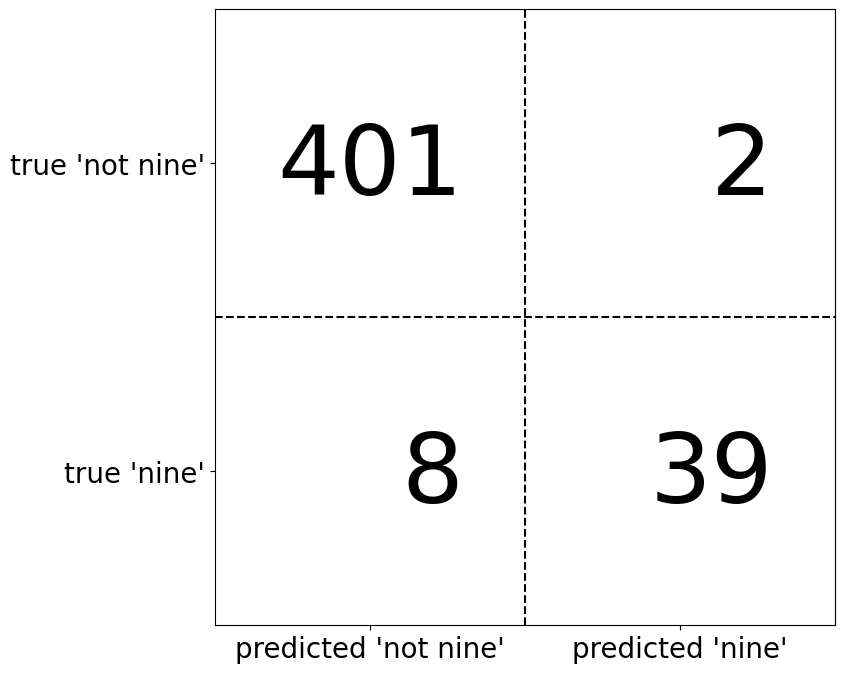

In [109]:
import mglearn
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font", family = "AppleGothic")

plt.rcParams["axes.unicode_minus"] = False

mglearn.plots.plot_confusion_matrix_illustration()
plt.show()